In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tsfresh import extract_features
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [2]:
train = pd.read_csv('DengAI_Predicting_Disease_Spread_Training_Data_Features.csv')
feat_train = pd.read_csv('DengAI_Predicting_Disease_Spread_Training_Data_Labels.csv')
test = pd.read_csv('DengAI_Predicting_Disease_Spread_Test_Data_Features.csv')

In [3]:
train.sample(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1202,iq,2005,32,2005-08-13,0.282643,0.227029,0.282557,0.239000,38.17,298.925714,...,1.99,74.855714,38.17,15.150000,12.185714,27.325000,11.850000,33.5,19.8,36.6
1341,iq,2008,16,2008-04-15,0.302614,0.244671,0.296314,0.328757,79.74,297.447143,...,45.96,92.124286,79.74,17.504286,7.785714,26.800000,8.100000,33.6,21.7,61.0
124,sj,1992,38,1992-09-16,0.051900,0.072267,0.177571,0.158814,41.32,299.978571,...,32.60,79.525714,41.32,17.541429,2.342857,28.142857,7.085714,32.8,23.9,28.9
137,sj,1992,51,1992-12-16,NaN,0.066425,0.192343,0.194129,0.00,298.285714,...,24.94,76.661429,0.00,15.251429,2.642857,26.685714,8.385714,32.2,21.7,47.5
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0


In [3]:
train.fillna(train.mean(), inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_7460\1059553085.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(), inplace=True)


In [4]:
test.fillna(train.mean(), inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_7460\1002868538.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(train.mean(), inplace=True)


In [5]:
test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [6]:
data=pd.merge(train, feat_train)

In [9]:
data.info

<bound method DataFrame.info of      city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1      sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2      sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3      sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4      sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
...   ...   ...         ...             ...       ...       ...       ...   
1451   iq  2010          21      2010-05-28  0.342750  0.318900  0.256343   
1452   iq  2010          22      2010-06-04  0.160157  0.160371  0.136043   
1453   iq  2010          23      2010-06-11  0.247057  0.146057  0.250357   
1454   iq  2010          24      2010-06-18  0.333914  0.245771  0.278886   
1455   iq  2010          25      2010-06-25  0.298186  0.232971  0.274214   

       ndvi_sw  precipitation_amt_mm  reana

<AxesSubplot:>

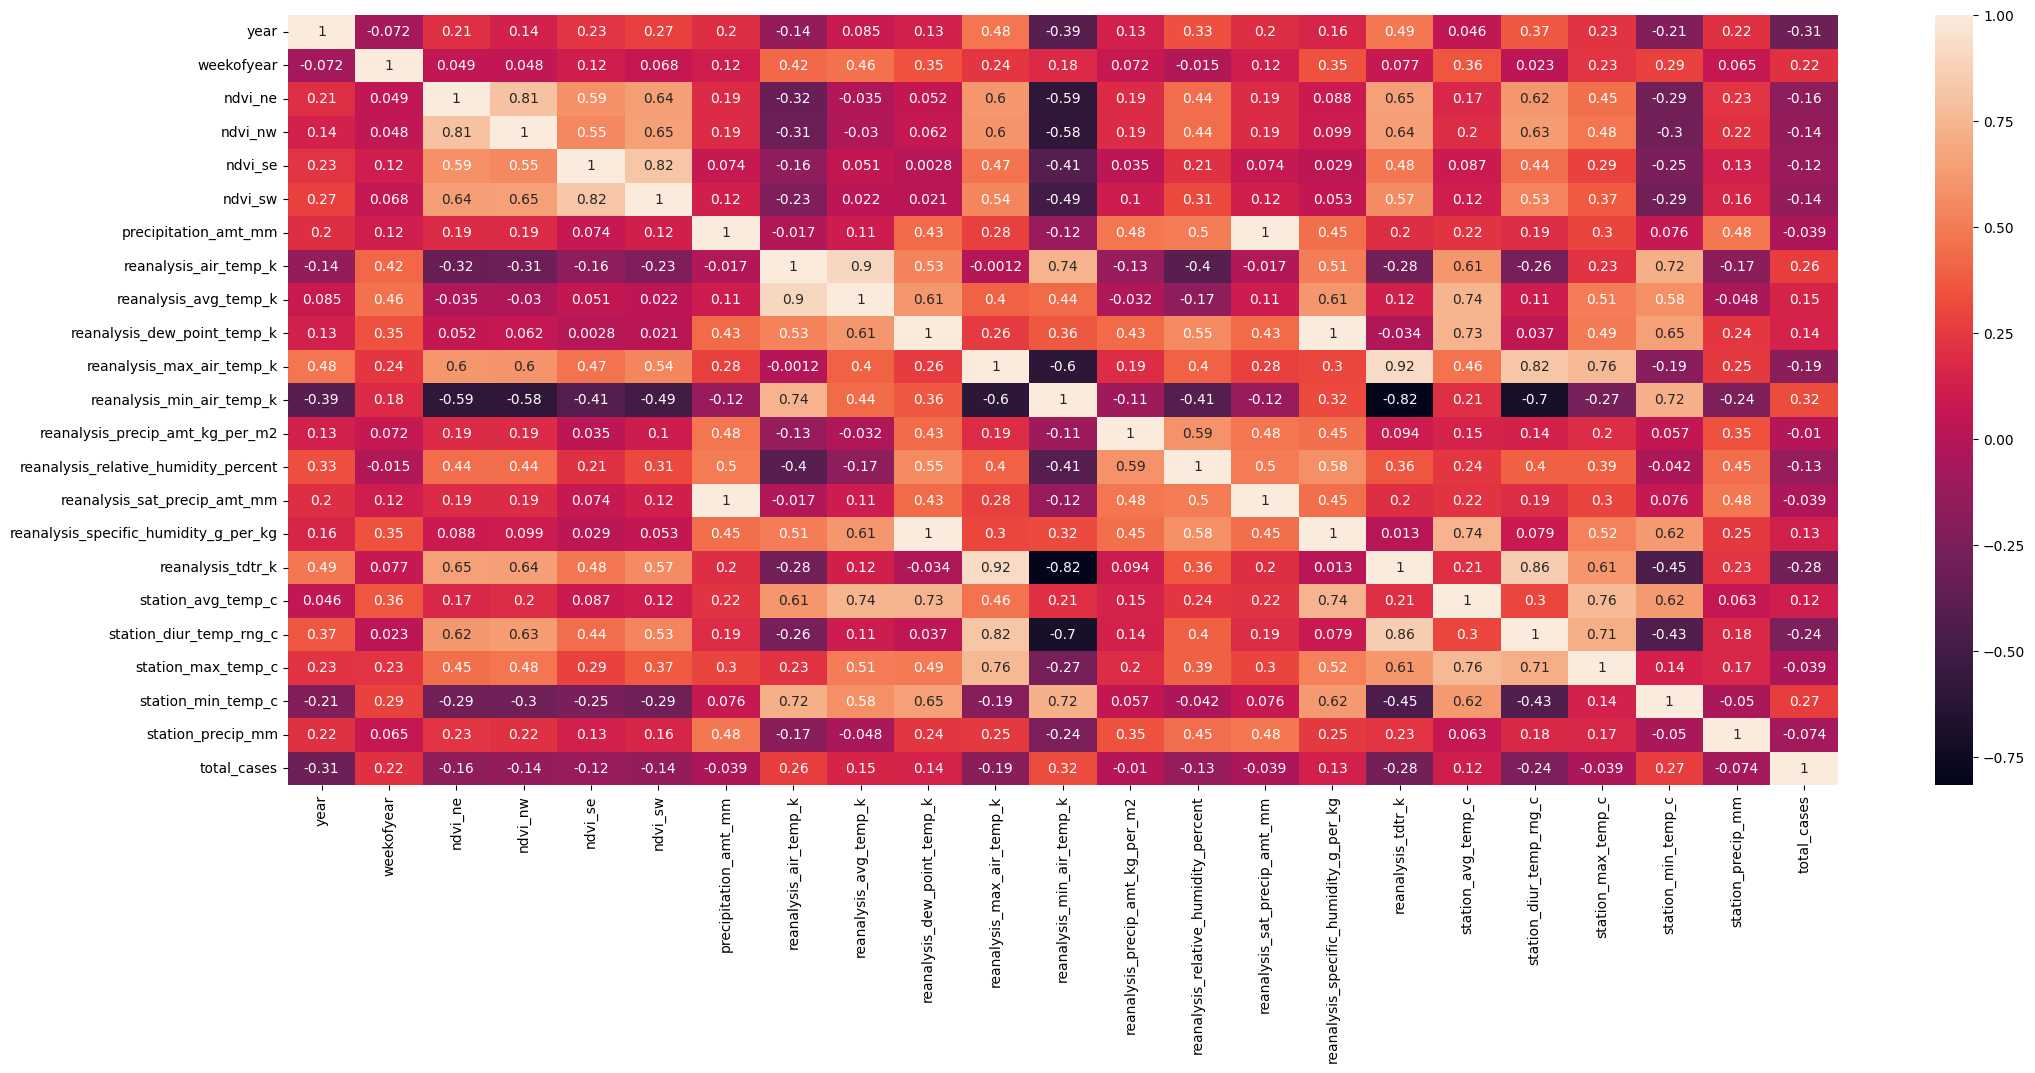

In [9]:
# Calculating the correlation matrix

correlation = data.corr()

f, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(correlation, annot=True, ax=ax)

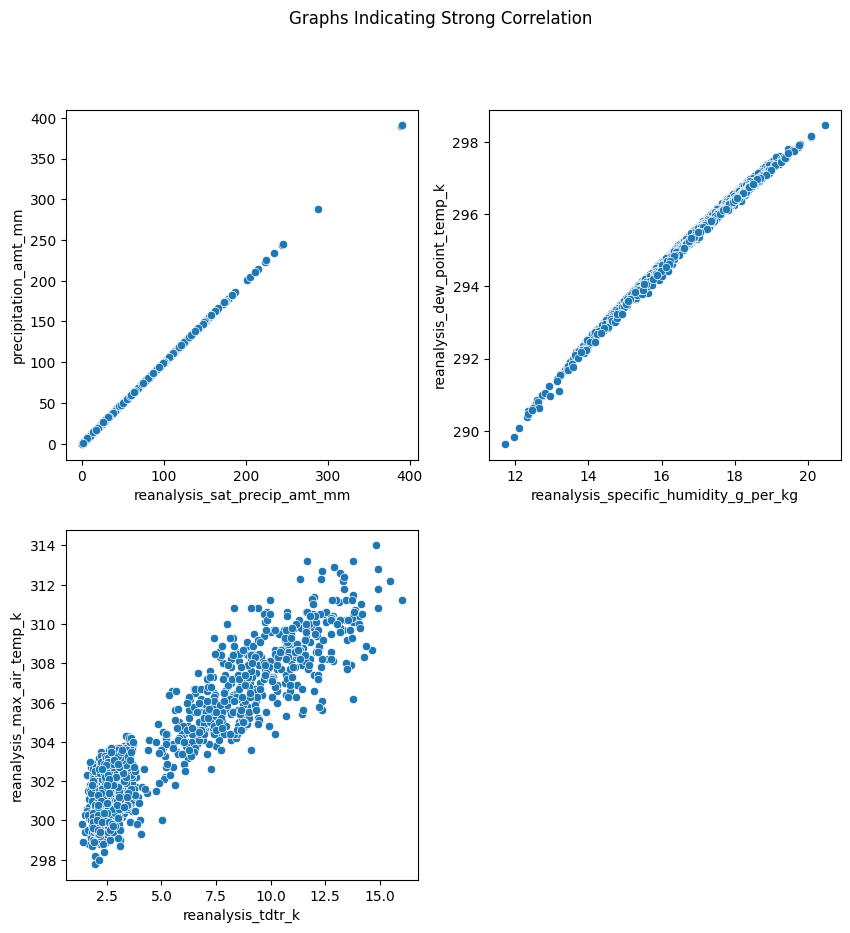

In [10]:
# Visualizing the relationship between features which show strong correlation

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.scatterplot(x='reanalysis_sat_precip_amt_mm', y='precipitation_amt_mm', data=data, ax=axes[0,0])
sns.scatterplot(x='reanalysis_specific_humidity_g_per_kg', y='reanalysis_dew_point_temp_k', data=data, ax=axes[0,1])
sns.scatterplot(x='reanalysis_tdtr_k', y='reanalysis_max_air_temp_k', data=data, ax=axes[1,0])
axes[1, 1].axis('off')

plt.suptitle('Graphs Indicating Strong Correlation')

plt.show()

In [11]:
# Finding the correlation for the above columns

feature1 = data['reanalysis_specific_humidity_g_per_kg']
feature2 = data['reanalysis_dew_point_temp_k']

feature3 = data['reanalysis_sat_precip_amt_mm']
feature4 = data['precipitation_amt_mm']

feature5 = data['reanalysis_tdtr_k']
feature6 = data['reanalysis_max_air_temp_k']

# Calculate the correlation between the two columns
correlation_1 = feature1.corr(feature2)
correlation_2 = feature3.corr(feature4)
correlation_3 = feature5.corr(feature6)

print("Correlation between temperature columns:", correlation_1)
print("Correlation between temperature columns:", correlation_2)
print("Correlation between temperature columns:", correlation_3)

Correlation between temperature columns: 0.9970512932011406
Correlation between temperature columns: 1.0
Correlation between temperature columns: 0.9185782576923713


In [12]:
# Dropping the columns

data = data.drop(['reanalysis_tdtr_k'], axis=1)
data

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,25.433333,8.733333,31.2,21.0,16.0,1


In [13]:
# Standardizing numerical variables

num_cols = ['ndvi_ne', 'ndvi_nw','reanalysis_specific_humidity_g_per_kg','reanalysis_sat_precip_amt_mm', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_k', 
            'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
            'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent',
            'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c',
            'station_precip_mm']

data[num_cols] = (data[num_cols] - data[num_cols].mean()) / data[num_cols].std()
data

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,-0.150531,-0.227670,-0.072305,-0.296505,12.42,-0.831532,...,-0.188329,-1.233821,-0.766097,-1.778296,-1.369033,-0.552883,-1.568727,-1.341962,-0.495302,4
1,sj,1990,19,1990-05-07,0.211014,0.098633,-0.565164,-0.562292,22.82,-0.361209,...,-0.513154,-0.672353,-0.527125,-0.893562,-0.370352,-0.804958,-0.386697,0.062465,-0.652431,5
2,sj,1990,20,1990-05-14,-0.841135,0.359944,-0.635521,-0.377857,34.54,0.058610,...,-0.324636,-0.015303,-0.257823,0.066449,-0.370352,-0.750455,-0.129734,0.445491,0.044031,4
3,sj,1990,21,1990-05-21,-0.104414,0.971816,0.324341,0.403289,15.36,0.210123,...,-0.606489,-0.255961,-0.698541,-0.047860,0.224368,-0.614198,0.435584,0.764679,-0.750106,3
4,sj,1990,22,1990-05-28,0.412043,1.117216,0.646894,0.540851,7.52,0.601533,...,-0.645764,-0.238728,-0.878689,0.301573,1.380145,0.625740,1.309259,1.147704,-0.711885,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,1.532221,1.598396,0.717057,1.083382,55.30,0.465802,...,0.112006,0.926288,0.219202,1.131476,1.137021,1.847510,1.514829,0.190140,-0.261733,5
1452,iq,2010,22,2010-06-04,0.136543,0.253055,-0.924161,0.280446,86.47,-0.273878,...,3.856963,1.323844,0.935427,0.861037,0.194445,1.163955,1.155081,-0.256723,-0.057890,8
1453,iq,2010,23,2010-06-11,0.800777,0.131578,0.635394,0.377211,58.94,-1.549116,...,0.241382,1.699759,0.302842,0.170536,-2.188176,-0.552883,-0.129734,-1.852663,-0.677911,1
1454,iq,2010,24,2010-06-18,1.464684,0.977796,1.024602,1.479359,59.67,-1.735352,...,0.512377,1.753060,0.319616,0.045074,-1.376514,0.321433,-0.643660,-0.703586,-0.495302,1


In [14]:
print(data['total_cases'].describe())
data['total_cases'].mean() #box plot

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64


24.67513736263736

In [15]:
import pandas as pd

# Define the threshold value
threshold = 24

# Create a new binary column for outbreak
data['outbreak'] = data['total_cases'].apply(lambda x: 1 if x >= threshold else 0)

# Calculate the IQR
Q1 = data['total_cases'].quantile(0.25)
Q3 = data['total_cases'].quantile(0.75)
IQR = Q3 - Q1

# Remove the outliers
data = data[(data['total_cases'] >= Q1 - 1.5 * IQR) & (data['total_cases'] <= Q3 + 1.5 * IQR)]

# Check the summary statistics of the total_cases column after removing the outliers
print(data['total_cases'].describe())


count    1332.000000
mean       14.945195
std        14.281042
min         0.000000
25%         4.000000
50%        10.000000
75%        22.000000
max        62.000000
Name: total_cases, dtype: float64


In [16]:
exo_var = ['reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k']
train_data_sa = data.loc[:1200, ['total_cases']+exo_var]
len(train_data_sa)-1

1077

In [86]:
#Edit code

# for 12

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

# Adding exogeneous variables
exo_var = ['reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k','reanalysis_specific_humidity_g_per_kg']

# Split the data into training and testing sets
train_data_sa = data.loc[:700, ['total_cases']+exo_var]
test_data_sa = data.loc[701:, ['total_cases']+exo_var]

# Create a TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=5)

# Train a SARIMAX model on the training data
sarimax_model = SARIMAX(train_data_sa['total_cases'], exog=train_data_sa[exo_var], order=(2, 1, 1), seasonal_order=(3, 1, 1, 12))
sarimax_results = sarimax_model.fit()

# Predict total_cases for the testing data
predictions = sarimax_results.predict(start=len(train_data_sa), end=len(data)-1, exog=test_data_sa[exo_var])

# Calculate mean absolute error of the predictions
mae = mean_absolute_error(test_data_sa['total_cases'], predictions)

print("Mean absolute error:", mae)

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean absolute error: 29.965621983748115


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


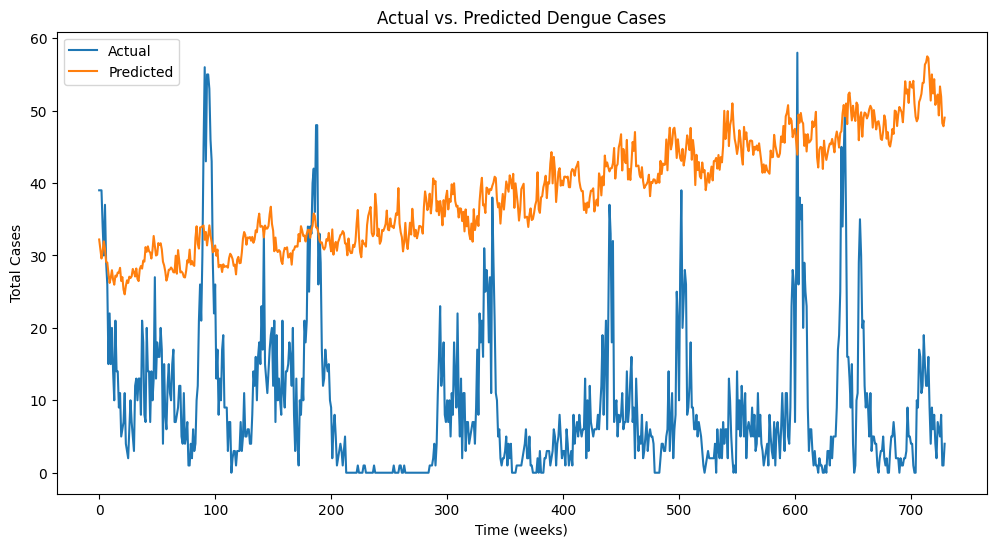

In [94]:
#Edit code

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data_sa['total_cases'].reset_index(drop=True), label='Actual')
plt.plot(predictions.reset_index(drop=True), label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Dengue Cases')
plt.xlabel('Time (weeks)')
plt.ylabel('Total Cases')
plt.show()


In [805]:
#Edit code

# for 24

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

# Adding exogeneous variables
exo_var = ['reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k','reanalysis_specific_humidity_g_per_kg']

# Split the data into training and testing sets
train_data_sa = data.loc[:1200, ['total_cases']+exo_var]
test_data_sa = data.loc[1201:, ['total_cases']+exo_var]

# Create a TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=5)

# Train a SARIMAX model on the training data
sarimax_model = SARIMAX(train_data_sa['total_cases'], exog=train_data_sa[exo_var], order=(2, 1, 1), seasonal_order=(3, 1, 1, 24))
sarimax_results = sarimax_model.fit()

# Predict total_cases for the testing data
predictions = sarimax_results.predict(start=len(train_data_sa), end=len(data)-1, exog=test_data_sa[exo_var])

# Calculate mean absolute error of the predictions
mae = mean_absolute_error(test_data_sa['total_cases'], predictions)

print("Mean absolute error:", mae)

Mean absolute error: 6.15259716413508


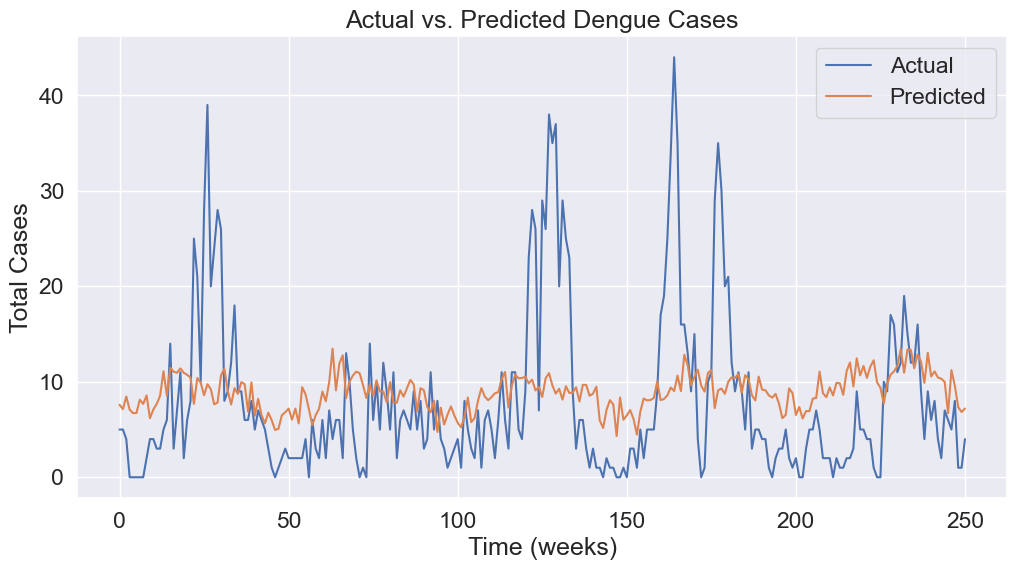

In [806]:
#Edit code

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data_sa['total_cases'].reset_index(drop=True), label='Actual')
plt.plot(predictions.reset_index(drop=True), label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Dengue Cases')
plt.xlabel('Time (weeks)')
plt.ylabel('Total Cases')
plt.show()


In [809]:
#Edit code

# for 52

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

# Adding exogeneous variables
exo_var = ['reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k','reanalysis_specific_humidity_g_per_kg']

# Split the data into training and testing sets
train_data_sa = data.loc[:1200, ['total_cases']+exo_var]
test_data_sa = data.loc[1201:, ['total_cases']+exo_var]

# Create a TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=5)

# Train a SARIMAX model on the training data
sarimax_model = SARIMAX(train_data_sa['total_cases'], exog=train_data_sa[exo_var], order=(2, 1, 1), seasonal_order=(3, 1, 1, 52))
sarimax_results = sarimax_model.fit()

# Predict total_cases for the testing data
predictions = sarimax_results.predict(start=len(train_data_sa), end=len(data)-1, exog=test_data_sa[exo_var])

# Calculate mean absolute error of the predictions
mae = mean_absolute_error(test_data_sa['total_cases'], predictions)

print("Mean absolute error:", mae)

mse = mean_squared_error(test_data_sa['total_cases'], predictions)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

Mean absolute error: 6.468889042588608
Root Mean Squared Error: 8.445117157071442


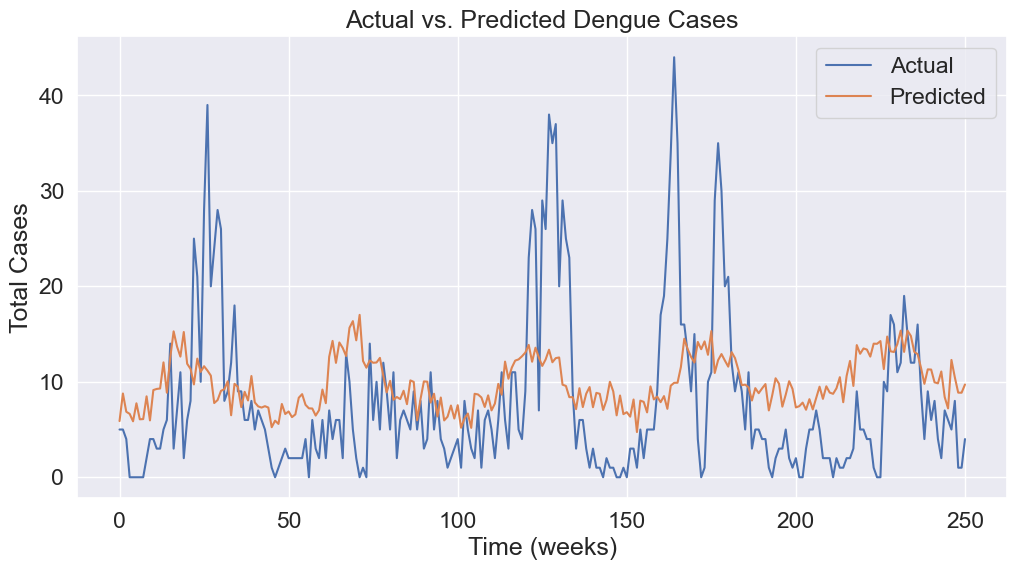

In [810]:
#Edit code

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data_sa['total_cases'].reset_index(drop=True), label='Actual')
plt.plot(predictions.reset_index(drop=True), label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Dengue Cases')
plt.xlabel('Time (weeks)')
plt.ylabel('Total Cases')
plt.show()


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean absolute error: 10.42523651697093
Root Mean Squared Error: 15.524896186439788


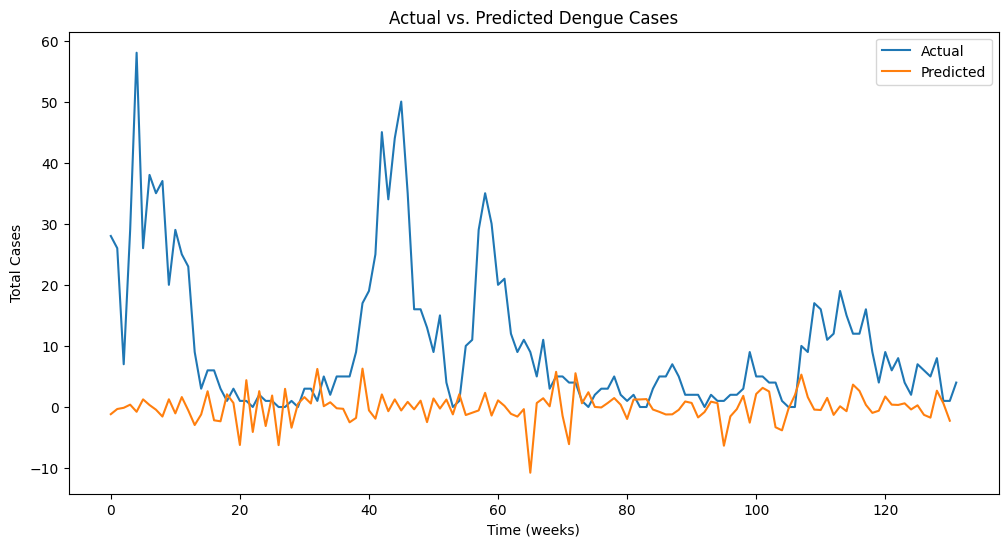

In [30]:
#Edit code

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

#Define exogenous variables
exogenous_var = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k', 'station_min_temp_c']

#Split the data into training and testing sets
train_data_a = data.iloc[:1200]
test_data_a = data.iloc[1200:]

#Split the exogenous variables data into training and testing sets
train_exog_a = data[exogenous_var].iloc[:1200]
test_exog_a = data[exogenous_var].iloc[1200:]

#Perform differencing on the training data
train_diff = train_data_a['total_cases'].diff().dropna()

#Scale the training data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_diff.values.reshape(-1, 1))

#Create a TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=5)

#Train an ARIMA model on the training data with exogenous variables
arima_model = ARIMA(train_scaled, exog=train_exog_a.diff().iloc[1:], order=(1, 0, 0)) # Check if need to keep seasonal components
arima_results = arima_model.fit()

#Perform differencing on the testing data
test_diff = test_data_a['total_cases'].diff().dropna()

#Scale the testing data
test_scaled = scaler.transform(test_diff.values.reshape(-1, 1))

#Predict total_cases for the testing data with exogenous variables
predictions_diff_array = predictions_diff.values.reshape(-1, 1)
predictions = scaler.inverse_transform(predictions_diff_array).flatten()

#Calculate mean absolute error of the predictions
mae = mean_absolute_error(test_data_a['total_cases'].iloc[1:], predictions)

print("Mean absolute error:", mae)

mse = mean_squared_error(test_data_a['total_cases'].iloc[1:], predictions)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

#Edit code

#Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data_a['total_cases'].reset_index(drop=True), label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Dengue Cases')
plt.xlabel('Time (weeks)')
plt.ylabel('Total Cases')
plt.show()

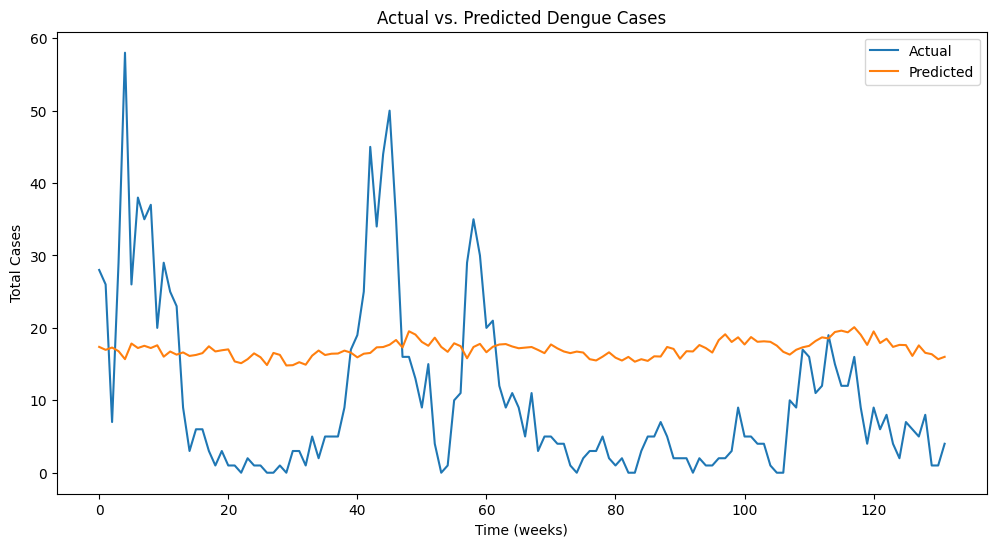

In [27]:
#Edit code

#Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data_a['total_cases'].reset_index(drop=True), label='Actual')
plt.plot(predictions.reset_index(drop=True), label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Dengue Cases')
plt.xlabel('Time (weeks)')
plt.ylabel('Total Cases')
plt.show()

## Setting manual threshold of 25 to binary classify the target variable

In [111]:
threshold = 25

# create a new column with binary values based on the threshold
data['outbreak'] = data['total_cases'].apply(lambda x: 1 if x >= threshold else 0)
data['outbreak']

C:\Users\Acer\AppData\Local\Temp\ipykernel_18352\1869573459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['outbreak'] = data['total_cases'].apply(lambda x: 1 if x >= threshold else 0)


0       0
1       0
2       0
3       0
4       0
       ..
1451    0
1452    0
1453    0
1454    0
1455    0
Name: outbreak, Length: 1332, dtype: int64

In [112]:
data.iloc[:, -1]

0       0
1       0
2       0
3       0
4       0
       ..
1451    0
1452    0
1453    0
1454    0
1455    0
Name: outbreak, Length: 1332, dtype: int64

In [113]:


data.drop(['week_start_date'], axis=1, inplace=True)
data.drop(['city'], axis=1, inplace=True)
data2 = data.copy(deep=True)
data.drop(['total_cases'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-2], data.iloc[:, -1], test_size=0.2, random_state=42)

C:\Users\Acer\AppData\Local\Temp\ipykernel_18352\596729227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['week_start_date'], axis=1, inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_18352\596729227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['city'], axis=1, inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_18352\596729227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop([

In [114]:
data

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,outbreak
0,1990,18,-0.150531,-0.227670,-0.072305,-0.296505,12.42,-0.831532,-1.179222,-1.860083,...,-0.188329,-1.233821,-0.766097,-1.778296,-1.369033,-0.552883,-1.568727,-1.341962,-0.495302,0
1,1990,19,0.211014,0.098633,-0.565164,-0.562292,22.82,-0.361209,-0.622505,-0.850499,...,-0.513154,-0.672353,-0.527125,-0.893562,-0.370352,-0.804958,-0.386697,0.062465,-0.652431,0
2,1990,20,-0.841135,0.359944,-0.635521,-0.377857,34.54,0.058610,-0.275978,0.123431,...,-0.324636,-0.015303,-0.257823,0.066449,-0.370352,-0.750455,-0.129734,0.445491,0.044031,0
3,1990,21,-0.104414,0.971816,0.324341,0.403289,15.36,0.210123,0.002381,0.041801,...,-0.606489,-0.255961,-0.698541,-0.047860,0.224368,-0.614198,0.435584,0.764679,-0.750106,0
4,1990,22,0.412043,1.117216,0.646894,0.540851,7.52,0.601533,0.348908,0.377703,...,-0.645764,-0.238728,-0.878689,0.301573,1.380145,0.625740,1.309259,1.147704,-0.711885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,21,1.532221,1.598396,0.717057,1.083382,55.30,0.465802,1.229430,1.037311,...,0.112006,0.926288,0.219202,1.131476,1.137021,1.847510,1.514829,0.190140,-0.261733,0
1452,2010,22,0.136543,0.253055,-0.924161,0.280446,86.47,-0.273878,0.133039,0.792421,...,3.856963,1.323844,0.935427,0.861037,0.194445,1.163955,1.155081,-0.256723,-0.057890,0
1453,2010,23,0.800777,0.131578,0.635394,0.377211,58.94,-1.549116,-1.298518,0.167529,...,0.241382,1.699759,0.302842,0.170536,-2.188176,-0.552883,-0.129734,-1.852663,-0.677911,0
1454,2010,24,1.464684,0.977796,1.024602,1.479359,59.67,-1.735352,-1.355326,0.051183,...,0.512377,1.753060,0.319616,0.045074,-1.376514,0.321433,-0.643660,-0.703586,-0.495302,0


In [115]:
# train SVM model
svm = SVC(kernel="linear", C=1)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

# train XGBoost model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

# draw confusion matrix
conf_mat = confusion_matrix(y_test, svm_preds)
print('Confusion Matrix:\n', conf_mat)

conf_mat = confusion_matrix(y_test, xgb_preds)
print('Confusion Matrix:\n', conf_mat)

Confusion Matrix:
 [[204   7]
 [ 46  10]]
Confusion Matrix:
 [[204   7]
 [ 27  29]]


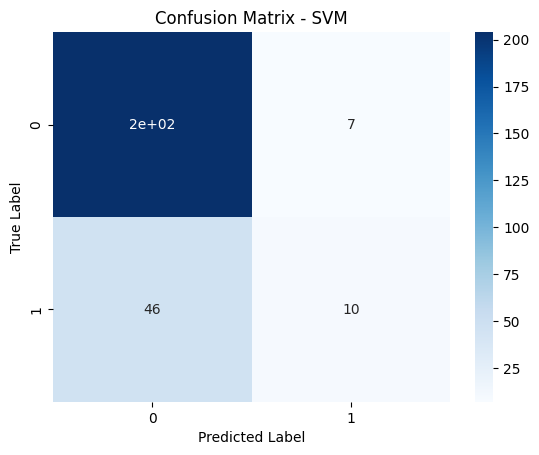

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# draw confusion matrix
conf_mat_1 = confusion_matrix(y_test, svm_preds)

# create heatmap using seaborn
sns.heatmap(conf_mat_1, annot=True, cmap='Blues')

# set axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')

# display the plot
plt.show()


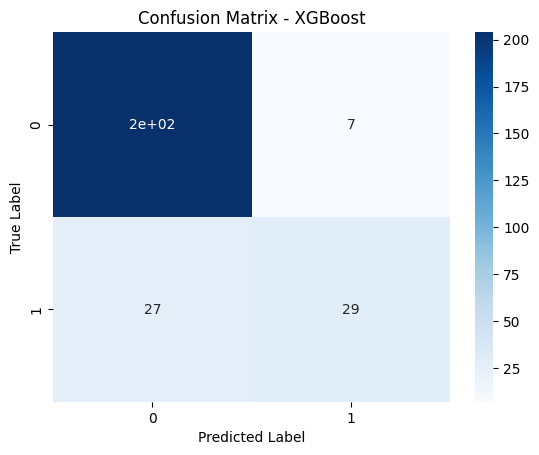

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# draw confusion matrix
conf_mat_2 = confusion_matrix(y_test, xgb_preds)

# create heatmap using seaborn
sns.heatmap(conf_mat_2, annot=True, cmap='Blues')

# set axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')

# display the plot
plt.show()


In [118]:
# Check classification report for SVM
print("SVM Classification Report:")
print(classification_report(y_test, svm_preds))

# Check classification report for Random Forest
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       211
           1       0.59      0.18      0.27        56

    accuracy                           0.80       267
   macro avg       0.70      0.57      0.58       267
weighted avg       0.77      0.80      0.76       267

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       211
           1       0.81      0.52      0.63        56

    accuracy                           0.87       267
   macro avg       0.84      0.74      0.78       267
weighted avg       0.87      0.87      0.86       267



## Converting continuos variable into binary for binary classification using ROC curve analysis and SVM

In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Define the threshold value
threshold = 24

# Create a new binary column for outbreak
data2['outbreak'] = data2['total_cases'].apply(lambda x: 1 if x >= threshold else 0)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data2.iloc[:, 4:-1], data2.iloc[:, -1], test_size=0.3, random_state=42)

# Train a classification model
svm = SVC(kernel='sigmoid', C=0.1, probability=True)
svm.fit(X_train, y_train)

# Predict the probability scores for the test set
proba_scores = svm.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, proba_scores)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold value
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Create a new binary column based on the optimal threshold
test_proba_scores = svm.predict_proba(X_test)[:, 1]
y_pred = [1 if test_proba_scores[i] >= optimal_threshold else 0 for i in range(len(test_proba_scores))]

# Evaluate the performance of the model
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_mat)
print('Optimal Threshold:', optimal_threshold)
print('AUC:', roc_auc)


Confusion Matrix:
 [[280  32]
 [ 16  72]]
Optimal Threshold: 0.2932710262480132
AUC: 0.8853802447552448


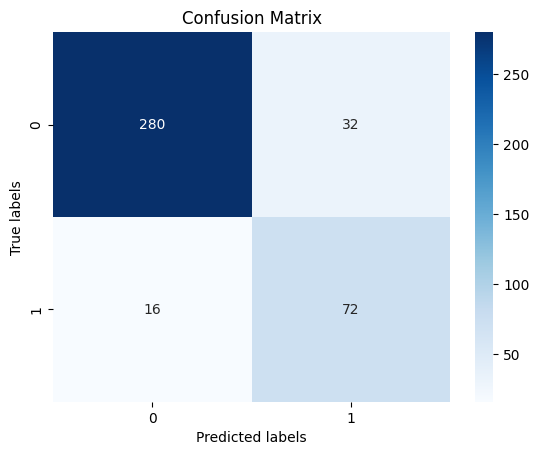

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix heatmap
conf_mat_heatmap = sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Set the axis labels and title
conf_mat_heatmap.set_xlabel('Predicted labels')
conf_mat_heatmap.set_ylabel('True labels')
conf_mat_heatmap.set_title('Confusion Matrix')

# Show the plot
plt.show()

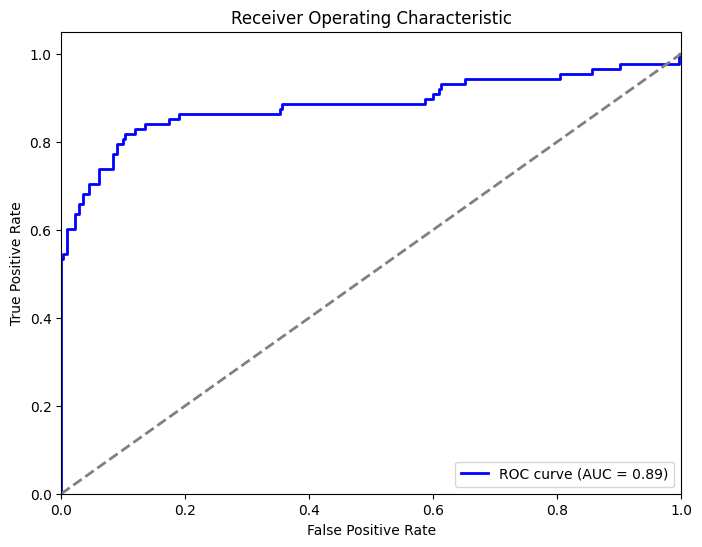

In [171]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [172]:
from sklearn.utils.class_weight import compute_class_weight

# Define the threshold value
threshold = 24

# Create a new binary column for outbreak
data2['outbreak'] = data2['total_cases'].apply(lambda x: 1 if x >= threshold else 0)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data2.iloc[:, 4:-1], data2.iloc[:, -1], test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Get class weights
class_weights = dict(zip(np.unique(y_train), compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)))

# Train a classification model with balanced class weights
svm = SVC(kernel='sigmoid', C=0.1, probability=True, class_weight=class_weights)
svm.fit(X_train_scaled, y_train)

# Predict the probability scores for the test set
proba_scores = svm.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, proba_scores)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold value
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Create a new binary column based on the optimal threshold
test_proba_scores = svm.predict_proba(X_test_scaled)[:, 1]
y_pred = [1 if test_proba_scores[i] >= optimal_threshold else 0 for i in range(len(test_proba_scores))]

# Evaluate the performance of the model
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_mat)
print('Optimal Threshold:', optimal_threshold)
print('AUC:', roc_auc)


Confusion Matrix:
 [[300  12]
 [  4  84]]
Optimal Threshold: 0.18507713721334837
AUC: 0.9924242424242424


In [173]:
# Check for Overfitting

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data2.iloc[:, 4:-1], data2.iloc[:, -1], test_size=0.3, random_state=42)

# Get class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))

# Train a classification model with balanced class weights
svm = SVC(kernel='sigmoid', C=0.1, probability=True, class_weight=class_weights)
svm.fit(X_train, y_train)

# Predict the probability scores for the training set
proba_scores_train = svm.predict_proba(X_train)[:, 1]

# Calculate the ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, proba_scores_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Predict the probability scores for the test set
proba_scores_test = svm.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, proba_scores_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Compare AUC scores for training and test sets
print('AUC score for training set:', roc_auc_train)
print('AUC score for test set:', roc_auc_test)


AUC score for training set: 0.8150425307737774
AUC score for test set: 0.8319675116550116


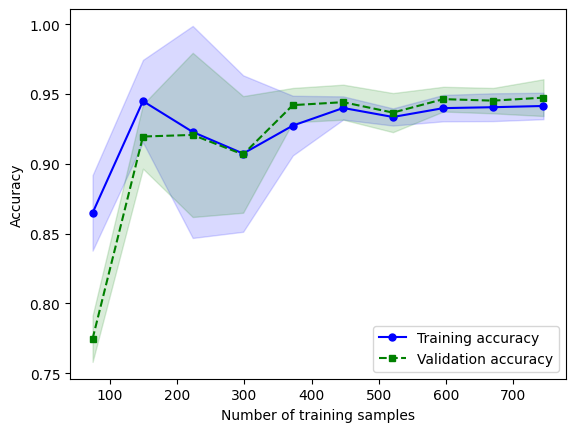

In [174]:
    from sklearn.model_selection import learning_curve

    train_sizes, train_scores, test_scores = learning_curve(estimator=svm,
                                                            X=X_train_scaled,
                                                            y=y_train,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            cv=5,
                                                            n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()


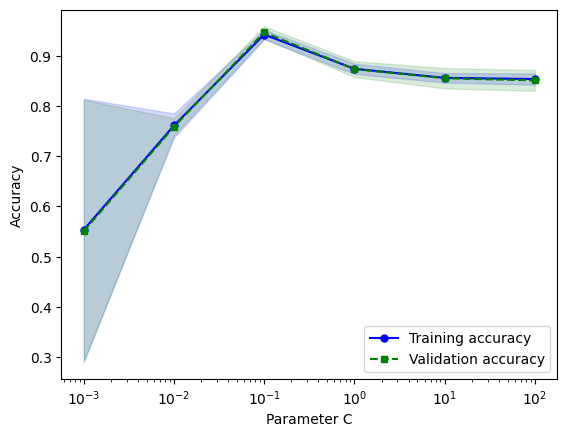

In [175]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=svm,
                                             X=X_train_scaled,
                                             y=y_train,
                                             param_name='C',
                                             param_range=param_range,
                                             cv=5,
                                             n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


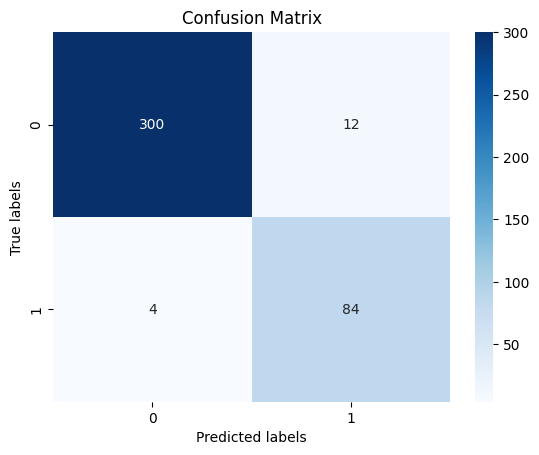

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix heatmap
conf_mat_heatmap = sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Set the axis labels and title
conf_mat_heatmap.set_xlabel('Predicted labels')
conf_mat_heatmap.set_ylabel('True labels')
conf_mat_heatmap.set_title('Confusion Matrix')

# Show the plot
plt.show()

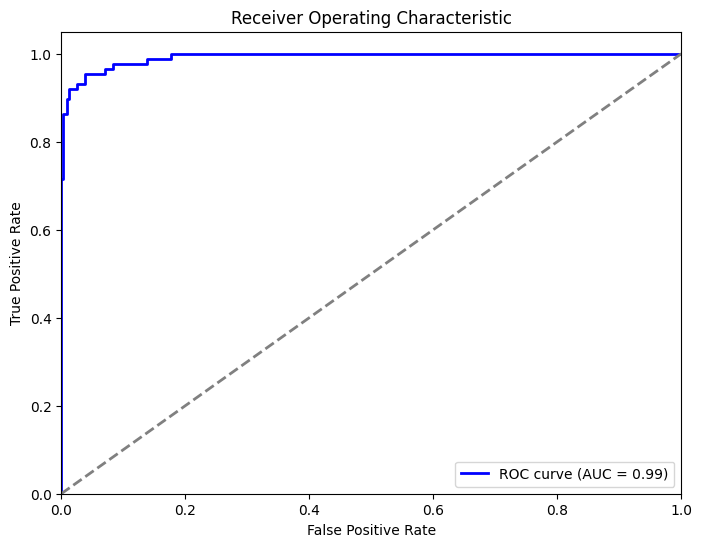

In [159]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the performance of the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/50
24/24 [==============================] - 1s 12ms/step - loss: 6.7242 - accuracy: 0.3302 - val_loss: 1.7508 - val_accuracy: 0.2995
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 2.3882 - accuracy: 0.5826 - val_loss: 0.5731 - val_accuracy: 0.8342
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 2.0644 - accuracy: 0.6537 - val_loss: 0.6003 - val_accuracy: 0.8182
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 1.5991 - accuracy: 0.6980 - val_loss: 0.5701 - val_accuracy: 0.8396
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 1.3781 - accuracy: 0.7074 - val_loss: 0.5208 - val_accuracy: 0.8663
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 1.1706 - accuracy: 0.7839 - val_loss: 0.4992 - val_accuracy: 0.8930
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0935 - accuracy: 0.7691 - val_loss: 0.4761 - val_accuracy: 0.8984
Epoch 8/50
24/24 [=

In [515]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Calculate precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

# Print the results
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

13/13 [==============================] - 0s 1ms/step
Precision: 0.9102564102564102
Recall: 0.9466666666666667
F1 score: 0.9281045751633987


Epoch 1/50
23/23 [==============================] - 0s 5ms/step - loss: 0.1168 - accuracy: 0.9498 - val_loss: 0.1867 - val_accuracy: 0.9667
Epoch 2/50
23/23 [==============================] - 0s 5ms/step - loss: 0.1311 - accuracy: 0.9498 - val_loss: 0.1963 - val_accuracy: 0.9611
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.1188 - accuracy: 0.9554 - val_loss: 0.1760 - val_accuracy: 0.9611
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 0.1102 - accuracy: 0.9484 - val_loss: 0.1689 - val_accuracy: 0.9667
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 0.0990 - accuracy: 0.9665 - val_loss: 0.1446 - val_accuracy: 0.9667
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 0.1199 - accuracy: 0.9582 - val_loss: 0.1493 - val_accuracy: 0.9667
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 0.1173 - accuracy: 0.9623 - val_loss: 0.1484 - val_accuracy: 0.9722
Epoch 8/50
23/23 [==

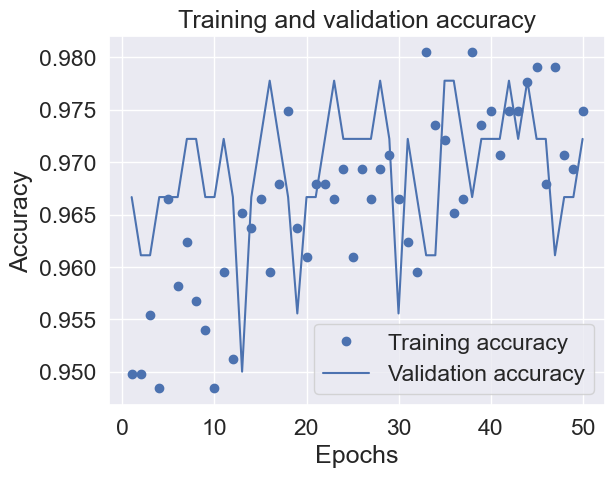

In [517]:
# Model Overfits after 15 epochs

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Save the training and validation accuracy in lists
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy over the epochs
import matplotlib.pyplot as plt

epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the performance of the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/15
24/24 [==============================] - 1s 10ms/step - loss: 2.4900 - accuracy: 0.6510 - val_loss: 0.6095 - val_accuracy: 0.7701
Epoch 2/15
24/24 [==============================] - 0s 3ms/step - loss: 1.7313 - accuracy: 0.6591 - val_loss: 0.5694 - val_accuracy: 0.7861
Epoch 3/15
24/24 [==============================] - 0s 5ms/step - loss: 1.1904 - accuracy: 0.7248 - val_loss: 0.4740 - val_accuracy: 0.8342
Epoch 4/15
24/24 [==============================] - 0s 5ms/step - loss: 0.9293 - accuracy: 0.7638 - val_loss: 0.4088 - val_accuracy: 0.8182
Epoch 5/15
24/24 [==============================] - 0s 4ms/step - loss: 0.7911 - accuracy: 0.7570 - val_loss: 0.3775 - val_accuracy: 0.8128
Epoch 6/15
24/24 [==============================] - 0s 5ms/step - loss: 0.5407 - accuracy: 0.7919 - val_loss: 0.3371 - val_accuracy: 0.8556
Epoch 7/15
24/24 [==============================] - 0s 5ms/step - loss: 0.5992 - accuracy: 0.8094 - val_loss: 0.3181 - val_accuracy: 0.8556
Epoch 8/15
24/24 [=

In [33]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/50
30/30 [==============================] - 0s 5ms/step - loss: 0.2847 - accuracy: 0.8927 - val_loss: 0.2413 - val_accuracy: 0.9475
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 0.2848 - accuracy: 0.8916 - val_loss: 0.2262 - val_accuracy: 0.9325
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 0.2450 - accuracy: 0.9045 - val_loss: 0.2149 - val_accuracy: 0.9275
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 0.2393 - accuracy: 0.9088 - val_loss: 0.2051 - val_accuracy: 0.9450
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 0.2779 - accuracy: 0.9067 - val_loss: 0.1925 - val_accuracy: 0.9475
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 0.2229 - accuracy: 0.9206 - val_loss: 0.1785 - val_accuracy: 0.9625
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 0.2395 - accuracy: 0.9163 - val_loss: 0.1697 - val_accuracy: 0.9550
Epoch 8/50
30/30 [==

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the data
train_features = pd.read_csv('DengAI_Predicting_Disease_Spread_Training_Data_Features.csv', index_col=[0,1,2])
train_labels = pd.read_csv('DengAI_Predicting_Disease_Spread_Training_Data_Labels.csv', index_col=[0,1,2])
test_features = pd.read_csv('DengAI_Predicting_Disease_Spread_Test_Data_Features.csv', index_col=[0,1,2])

test_features.drop(['week_start_date'] ,axis=1,inplace=True)
train_features.drop(['week_start_date'],axis=1,inplace=True)

# Create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in train_features and test_features
train_features = imputer.fit_transform(train_features)
test_features = imputer.transform(test_features)

In [36]:

# Preprocess the data
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)



# Split the data into train and validation sets
split = int(0.8 * len(train_features))
X_train, y_train = train_features[:split], train_labels.total_cases.values[:split]
X_val, y_val = train_features[split:], train_labels.total_cases.values[split:]

# Define the KNN algorithm
class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        y_pred = []
        for x in X:
            distances = []
            for i, x_train in enumerate(self.X):
                distance = np.linalg.norm(x - x_train)
                distances.append((distance, i))
            distances = sorted(distances)[:self.k]
            k_indices = [i for _, i in distances]
            k_labels = self.y[k_indices]
            y_pred.append(np.mean(k_labels))
        return y_pred

# Train and evaluate the KNN algorithm
knn = KNN(k=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
mse = np.mean((y_pred - y_val) ** 2)
print(f'Mean Squared Error: {mse:.2f}')
accuracy = np.mean(y_pred == y_val)
print(f'Accuracy: {accuracy:.2f}')

Mean Squared Error: 250.38
Accuracy: 0.01


In [37]:
from sklearn.decomposition import PCA

# Preprocess the data
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Reduce the dimensionality of the data with PCA
pca = PCA(n_components=10)
train_features = pca.fit_transform(train_features)
test_features = pca.transform(test_features)

# Create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in train_features and test_features
train_features = imputer.fit_transform(train_features)
test_features = imputer.transform(test_features)

# Split the data into train and validation sets
split = int(0.8 * len(train_features))
X_train, y_train = train_features[:split], train_labels.total_cases.values[:split]
X_val, y_val = train_features[split:], train_labels.total_cases.values[split:]

# Define the KNN algorithm
class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        y_pred = []
        for x in X:
            distances = []
            for i, x_train in enumerate(self.X):
                distance = np.linalg.norm(x - x_train)
                distances.append((distance, i))
            distances = sorted(distances)[:self.k]
            k_indices = [i for _, i in distances]
            k_labels = self.y[k_indices]
            y_pred.append(np.mean(k_labels))
        return y_pred

# Train and evaluate the KNN algorithm
knn = KNN(k=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
mse = np.mean((y_pred - y_val) ** 2)
print(f'Mean Squared Error: {mse:.2f}')
accuracy = np.mean(y_pred == y_val)
print(f'Accuracy: {accuracy:.2f}')


Mean Squared Error: 243.25
Accuracy: 0.00


In [63]:
len(train_features), train_labels.count()

(1456,
 total_cases    1456
 dtype: int64)

In [64]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Load the data
train_features = pd.read_csv('DengAI_Predicting_Disease_Spread_Training_Data_Features.csv', index_col=[0,1,2])
train_labels = pd.read_csv('DengAI_Predicting_Disease_Spread_Training_Data_Labels.csv', index_col=[0,1,2])
test_features = pd.read_csv('DengAI_Predicting_Disease_Spread_Test_Data_Features.csv', index_col=[0,1,2])

test_features.drop(['week_start_date'] ,axis=1,inplace=True)
train_features.drop(['week_start_date'],axis=1,inplace=True)

# Create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in train_features and test_features
train_features = imputer.fit_transform(train_features)
test_features = imputer.transform(test_features)

# Preprocess the data
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Split the data into train and validation sets
split = int(0.8 * len(train_features))
X_train, y_train = train_features[:split], train_labels.total_cases.iloc[:split].values.reshape(-1, 1)
X_val, y_val = train_features[split:], train_labels.total_cases.iloc[split:].values.reshape(-1, 1)

# Hyperparameter tuning
param_grid = {'n_neighbors': np.arange(1, 31)}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Train and evaluate the KNN algorithm with the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
mse = np.mean((y_pred - y_val) ** 2)
print(f'Mean Squared Error: {mse:.2f}')
accuracy = knn.score(X_val, y_val)
print(f'Accuracy: {accuracy:.2f}')

Mean Squared Error: 200.75
Accuracy: -0.28


In [40]:
# Load the data
df = pd.read_csv('DengAI_Predicting_Disease_Spread_Training_Data_Features.csv')
df_feat = pd.read_csv('DengAI_Predicting_Disease_Spread_Training_Data_Labels.csv')

df=pd.merge(df, df_feat)
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Fill missing values with the mean
data.fillna(data.mean(), inplace=True)

# Define the feature matrix X and target variable y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    J = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J

# Define the gradient descent function
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        theta = theta - (alpha / m) * np.dot(X.T, (h - y))
        J_history[i] = cost_function(X, y, theta)
    return theta, J_history

# Set the learning rate and number of iterations
alpha = 1
num_iters = 10000

# Add a column of ones to X for the intercept term
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

# Initialize the parameters theta
theta = np.zeros(X_train.shape[1])

# Run gradient descent to obtain the optimal parameters
theta, J_history = gradient_descent(X_train, y_train, theta, alpha, num_iters)

# Add a column of ones to X_test for the intercept term
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Predict the test set and calculate the accuracy
y_pred = sigmoid(np.dot(X_test, theta))
y_pred = np.round(y_pred)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


C:\Users\Acer\AppData\Local\Temp\ipykernel_18352\3359771435.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean(), inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_18352\3359771435.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Acer\AppData\Local\Temp\ipykernel_18352\3359771435.py:24: RuntimeWarning: divide by zero encountered in log
  J = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
C:\Users\Acer\AppData\Local\Temp\ipykernel_18352\3359771435.py:24: RuntimeWarning: invalid value encountered in multiply
  J = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


Accuracy: 0.79


In [66]:
from sklearn.linear_model import LogisticRegression

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create an instance of the LogisticRegression class
lr = LogisticRegression()

#Fit the model on the training data
lr.fit(X_train, y_train)

#Predict the test set and calculate the accuracy
y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7940074906367042


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
